In [1]:
from glob import glob
import locale
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
locale.setlocale(locale.LC_ALL,'pt')

'pt'

In [3]:
def format_ons_open_data( folder_name:str, columns:list[str], subsystems:list[str]=['NE','N','SE','S'], index_item:int=0)->pd.DataFrame:
    
    paths = glob(f'{folder_name}/*')
    columns = columns
    id_subs = subsystems
    dataframe_dict = dict(zip(id_subs, [pd.DataFrame()]*len(id_subs)))

    for path in paths:
        df = pd.read_csv(path, sep=';')

        for key in dataframe_dict.keys():
            aux = df.loc[df['id_subsistema']==key].copy()
            aux.index = pd.to_datetime(aux[columns[index_item]])
            aux = aux[[element for element in columns if element != columns[index_item]]].copy()
            aux.columns = [element + f'_{key}' for element in aux.columns]
            dataframe_dict[key] = pd.concat([dataframe_dict[key], aux])

    return pd.concat(list(dataframe_dict.values()),axis=1)

In [4]:
final_EAR_dataframe = format_ons_open_data('EAR', ['ear_data', 'ear_max_subsistema','ear_verif_subsistema_mwmes', 'ear_verif_subsistema_percentual'])

In [5]:
final_CMO_dataframe = format_ons_open_data('CMO_SEMANAL',['din_instante', 'val_cmomediasemanal', 'val_cmoleve', 'val_cmomedia', 'val_cmopesada'])

In [6]:
pd.date_range('2001-07-01','2023-03-31',freq='W-SUN')

DatetimeIndex(['2001-07-01', '2001-07-08', '2001-07-15', '2001-07-22',
               '2001-07-29', '2001-08-05', '2001-08-12', '2001-08-19',
               '2001-08-26', '2001-09-02',
               ...
               '2023-01-22', '2023-01-29', '2023-02-05', '2023-02-12',
               '2023-02-19', '2023-02-26', '2023-03-05', '2023-03-12',
               '2023-03-19', '2023-03-26'],
              dtype='datetime64[ns]', length=1135, freq='W-SUN')

In [7]:
PLD = pd.read_csv('PLD/pld.csv',sep=';',parse_dates=[3,4], index_col=[4]).iloc[1:]

In [8]:
PLD = PLD[PLD.columns[4:]]

In [9]:
plot_df = pd.DataFrame()

In [10]:
plot_df['CMO_SUDESTE'] = final_CMO_dataframe[final_CMO_dataframe.columns[[11]]]
plot_df['PLD_SUDESTE'] = PLD['SUDESTE'][PLD.index>='2005-01-01']
#plot_df['EAR_TOTAL'] = final_EAR_dataframe[final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.columns[0::3]].sum(axis=1)*100

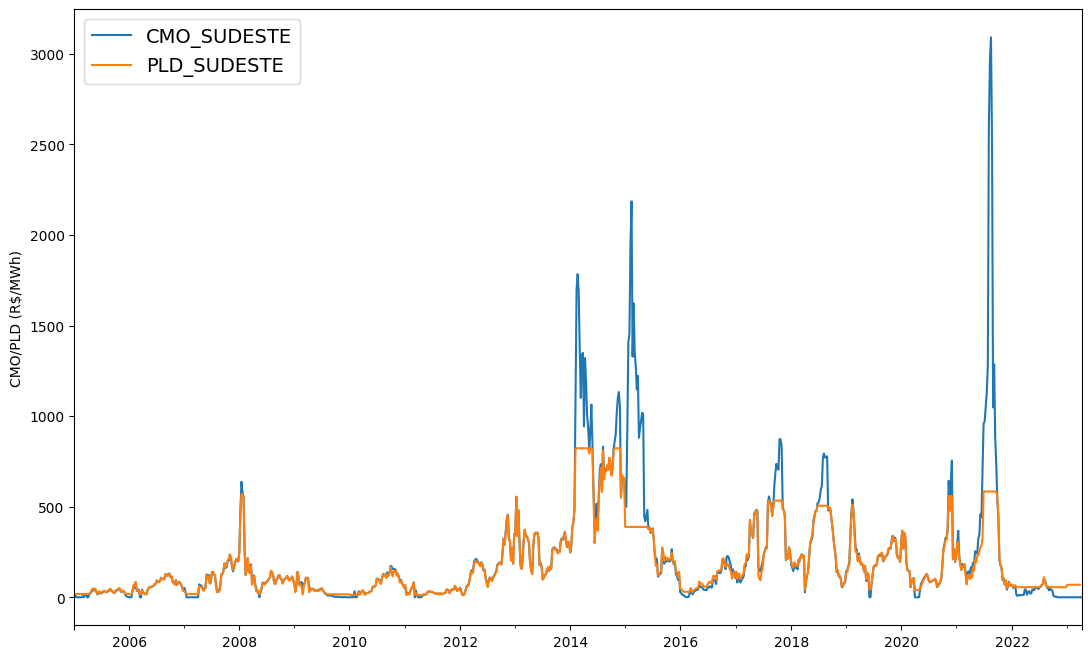

In [11]:
plot_df.plot(figsize=(13,8), xlabel='', ylabel='CMO/PLD (R$/MWh)')
plt.legend(fontsize=14)
plt.savefig('FIGURAS\\pldvscmo.jpg', dpi=300)

In [12]:
plot_df

,CMO_SUDESTE,PLD_SUDESTE
din_instante,,
2005-01-07,0.00,18.33
2005-01-14,7.64,18.33
2005-01-21,0.93,18.33
2005-01-28,0.00,18.33
2005-02-04,0.00,18.33
...,...,...
2023-03-17,0.00,69.04
2023-03-24,0.00,69.04
2023-03-31,0.00,69.04


<Axes: xlabel='DATA_FIM'>

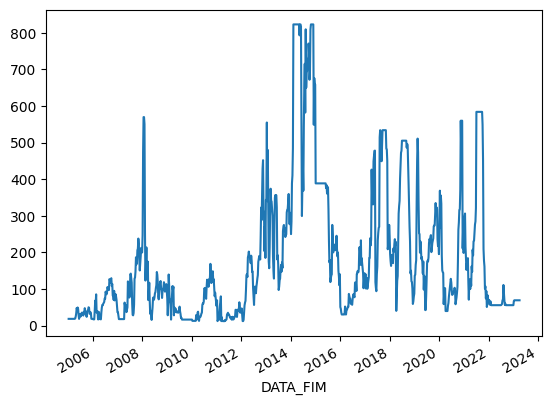

In [13]:
PLD['SUDESTE'][PLD.index>='2005-01-01'].plot()

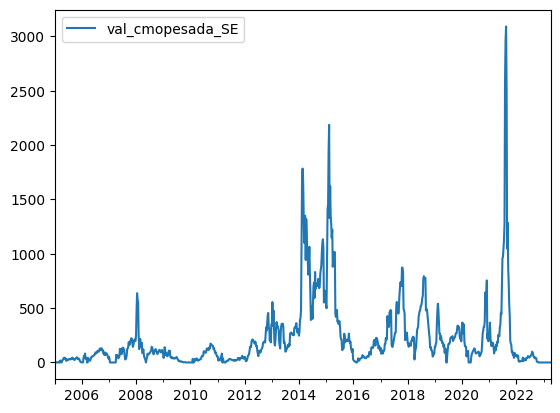

In [14]:
ax = (final_CMO_dataframe[final_CMO_dataframe.columns[[11]]]).plot(xlabel='')

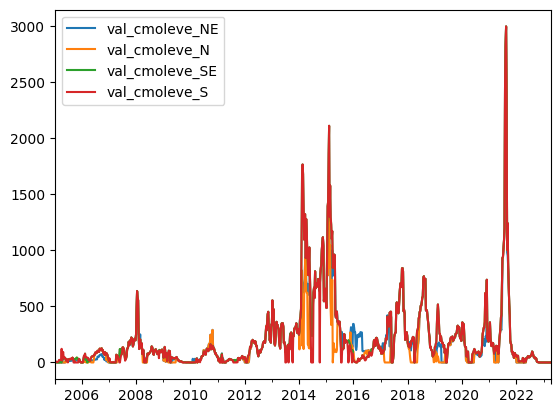

In [15]:
ax = (final_CMO_dataframe[final_CMO_dataframe.columns[1::4]]).plot(xlabel='')

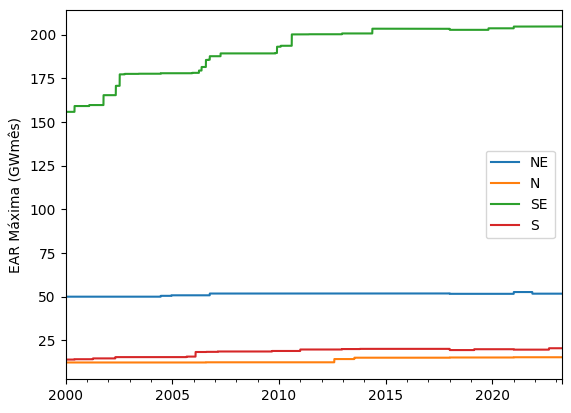

In [16]:
ax = (final_EAR_dataframe[final_EAR_dataframe.columns[0::3]]/1000).plot(ylabel='EAR Máxima (GWmês)', xlabel='')
ax.legend(['NE','N','SE','S'])
plt.savefig('FIGURAS\\evolucao_do_EAR.svg')

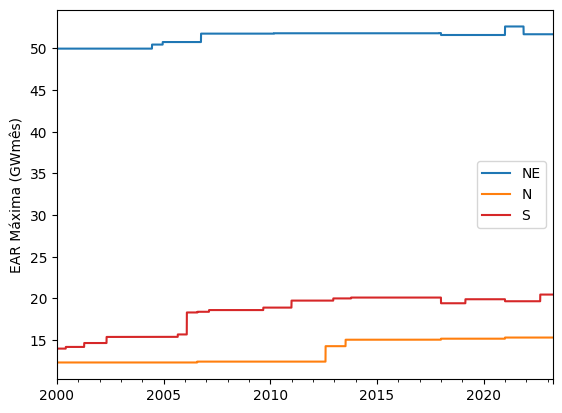

In [18]:
ax = (final_EAR_dataframe[final_EAR_dataframe.columns[0::3]]/1000).plot(ylabel='EAR Máxima (GWmês)', xlabel='')
ax.lines[2].remove()
#ax.set_ylim([5,60])
ax.relim()
ax.autoscale_view()
ax.legend(['NE','N','S'])
plt.savefig('FIGURAS\evolucao_do_EAR_zoom.svg')

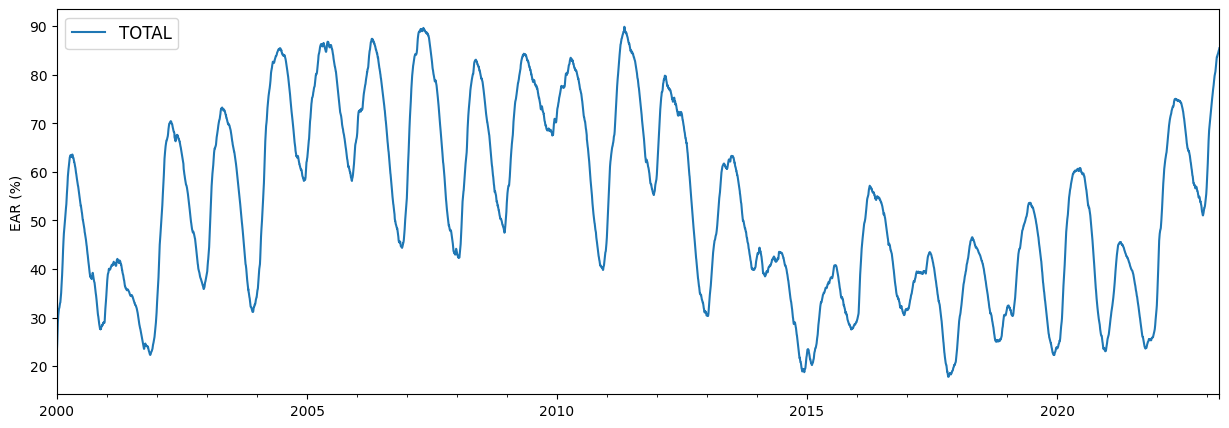

In [19]:
ax = (final_EAR_dataframe[final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.columns[0::3]].sum(axis=1)*100).plot(ylabel='EAR (%)', xlabel='', figsize=(15,5))
ax.legend(['TOTAL'], loc='upper left', fontsize=12)
#ax.set_ylim([0,100])
plt.savefig('FIGURAS\\EAR_todo_período.svg')

<Axes: xlabel='din_instante'>

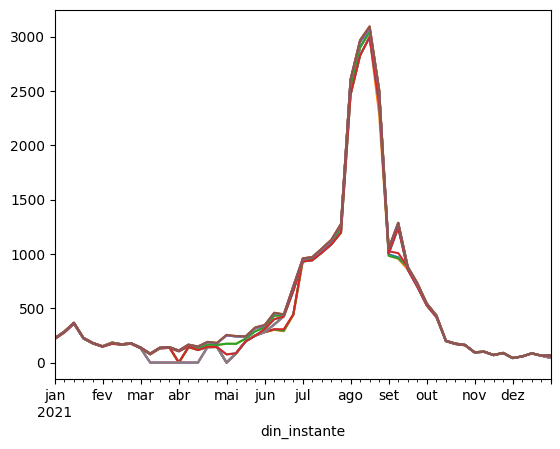

In [20]:
final_CMO_dataframe[final_CMO_dataframe.index.year==2021].plot(legend='')

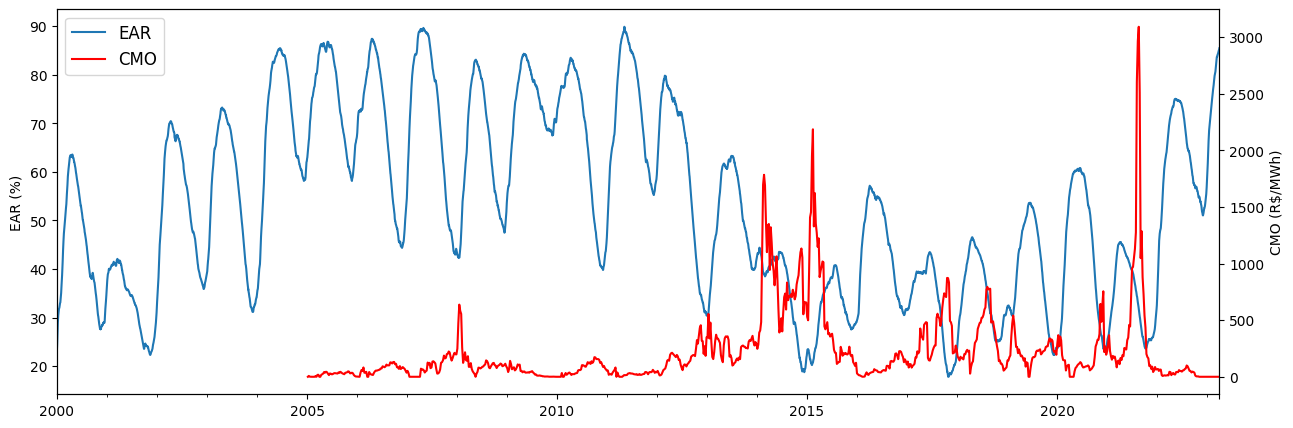

In [21]:
ax = (final_EAR_dataframe[final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.columns[0::3]].sum(axis=1)*100).plot(ylabel='EAR (%)', xlabel='', figsize=(15,5), label='EAR')
line1 = ax.lines
ax2 = ax.twinx()
y = final_CMO_dataframe[final_CMO_dataframe.columns[11]].values
x = final_CMO_dataframe[final_CMO_dataframe.columns[11]].index
ax2.plot(x,y, color='red', label='CMO')
ax2.set_ylabel('CMO (R$/MWh)')

line2 = ax2.lines

lines = line1 + line2

labs = [l.get_label() for l in lines]

ax.legend(lines, labs, loc='upper left', fontsize=12)

plt.savefig('FIGURAS\\EARvsCMO.svg')

In [22]:
EAR_percent_df = final_EAR_dataframe[final_EAR_dataframe.index.year==2021][final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.index.year==2021][final_EAR_dataframe.columns[0::3]].sum(axis=1)*100

In [23]:
EAR_percent_df.loc[lambda x: x.index=='2021-08-01'].values

array([35.49611239])

In [24]:
EAR_percent_df.loc[lambda x: x.index=='2021-08-01'].index.values

array(['2021-08-01T00:00:00.000000000'], dtype='datetime64[ns]')

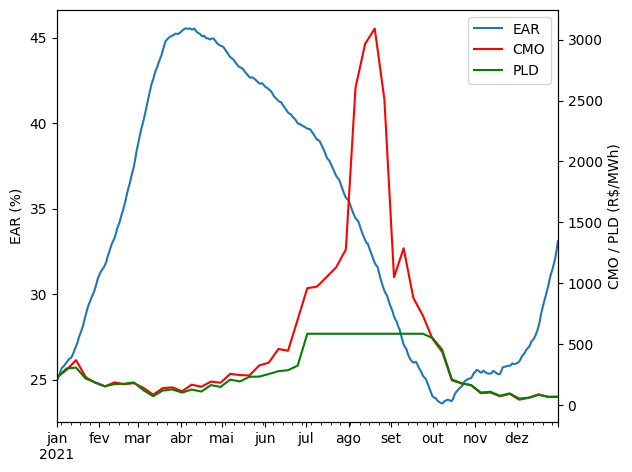

In [25]:
ax = (final_EAR_dataframe[final_EAR_dataframe.index.year==2021][final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.index.year==2021][final_EAR_dataframe.columns[0::3]].sum(axis=1)*100).plot(ylabel='EAR (%)', xlabel='', label='EAR')
line1 = ax.lines
ax2 = ax.twinx()
y = final_CMO_dataframe[final_CMO_dataframe.index.year==2021][final_CMO_dataframe.columns[11]].values
x = final_CMO_dataframe[final_CMO_dataframe.index.year==2021][final_CMO_dataframe.columns[11]].index
y_pld = plot_df['PLD_SUDESTE'].values
x_pld = plot_df['PLD_SUDESTE'].index
ax2.plot(x,y, color='red', label='CMO')
ax2.plot(x_pld,y_pld, color='green', label='PLD')
ax2.set_ylabel('CMO / PLD (R$/MWh)')
line2 = ax2.lines



lines = line1 + line2

labs = [l.get_label() for l in lines]

ax.legend(lines, labs, loc='upper right', fontsize=10)
plt.tight_layout(pad=1)
plt.savefig('FIGURAS\\EAR_PLD_CMO_DURANTE_CRISE.svg')

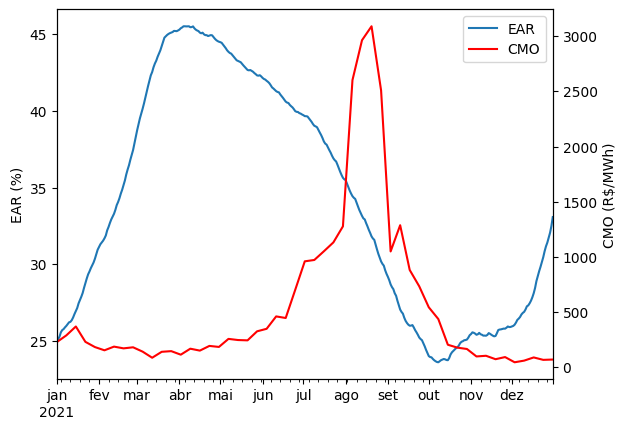

In [26]:
ano=2021
ax = (final_EAR_dataframe[final_EAR_dataframe.index.year==ano][final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.index.year==ano][final_EAR_dataframe.columns[0::3]].sum(axis=1)*100).plot(ylabel='EAR (%)', xlabel='', label='EAR')
line1 = ax.lines
ax2 = ax.twinx()
y = final_CMO_dataframe[final_CMO_dataframe.index.year==ano][final_CMO_dataframe.columns[11]].values
x = final_CMO_dataframe[final_CMO_dataframe.index.year==ano][final_CMO_dataframe.columns[11]].index
ax2.plot(x,y, color='red', label='CMO')
ax2.set_ylabel('CMO (R$/MWh)')
line2 = ax2.lines

lines = line1 + line2

labs = [l.get_label() for l in lines]

ax.legend(lines, labs, loc='upper right', fontsize=10)


In [27]:
zoom_dataframe = final_EAR_dataframe.loc[lambda x: (x.index >= '2014-01-01')&(x.index <= '2022-01-01')]

In [28]:
armazenamento_total_df = pd.DataFrame(columns=['EAR%'])

In [29]:
armazenamento_total_df['EAR%'] = (final_EAR_dataframe[final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.columns[0::3]].sum(axis=1)*100)

In [30]:
recuperacao_deplecao_df = armazenamento_total_df.resample('YS').agg(['first','max'])['EAR%']

In [31]:
recuperacao_deplecao_df['min'] = armazenamento_total_df.loc[lambda x: x.index.month>7].resample('YS').agg(['min'])['EAR%']

In [32]:
recuperacao_deplecao_df['Variação'] = recuperacao_deplecao_df['max'] - recuperacao_deplecao_df['first']
recuperacao_deplecao_df['Variação_f'] = (recuperacao_deplecao_df['min'] - recuperacao_deplecao_df['max'])

In [33]:
recuperacao_deplecao_df.head()

,first,max,min,Variação,Variação_f
ear_data,,,,,
2000-01-01,23.177150,63.561956,27.580614,40.384806,-35.981341
2001-01-01,36.940582,42.080586,22.337448,5.140003,-19.743138
2002-01-01,32.581431,70.388474,35.873638,37.807043,-34.514836
2003-01-01,39.178490,73.246061,31.145486,34.067571,-42.100575
2004-01-01,34.644000,85.425425,58.139390,50.781424,-27.286035


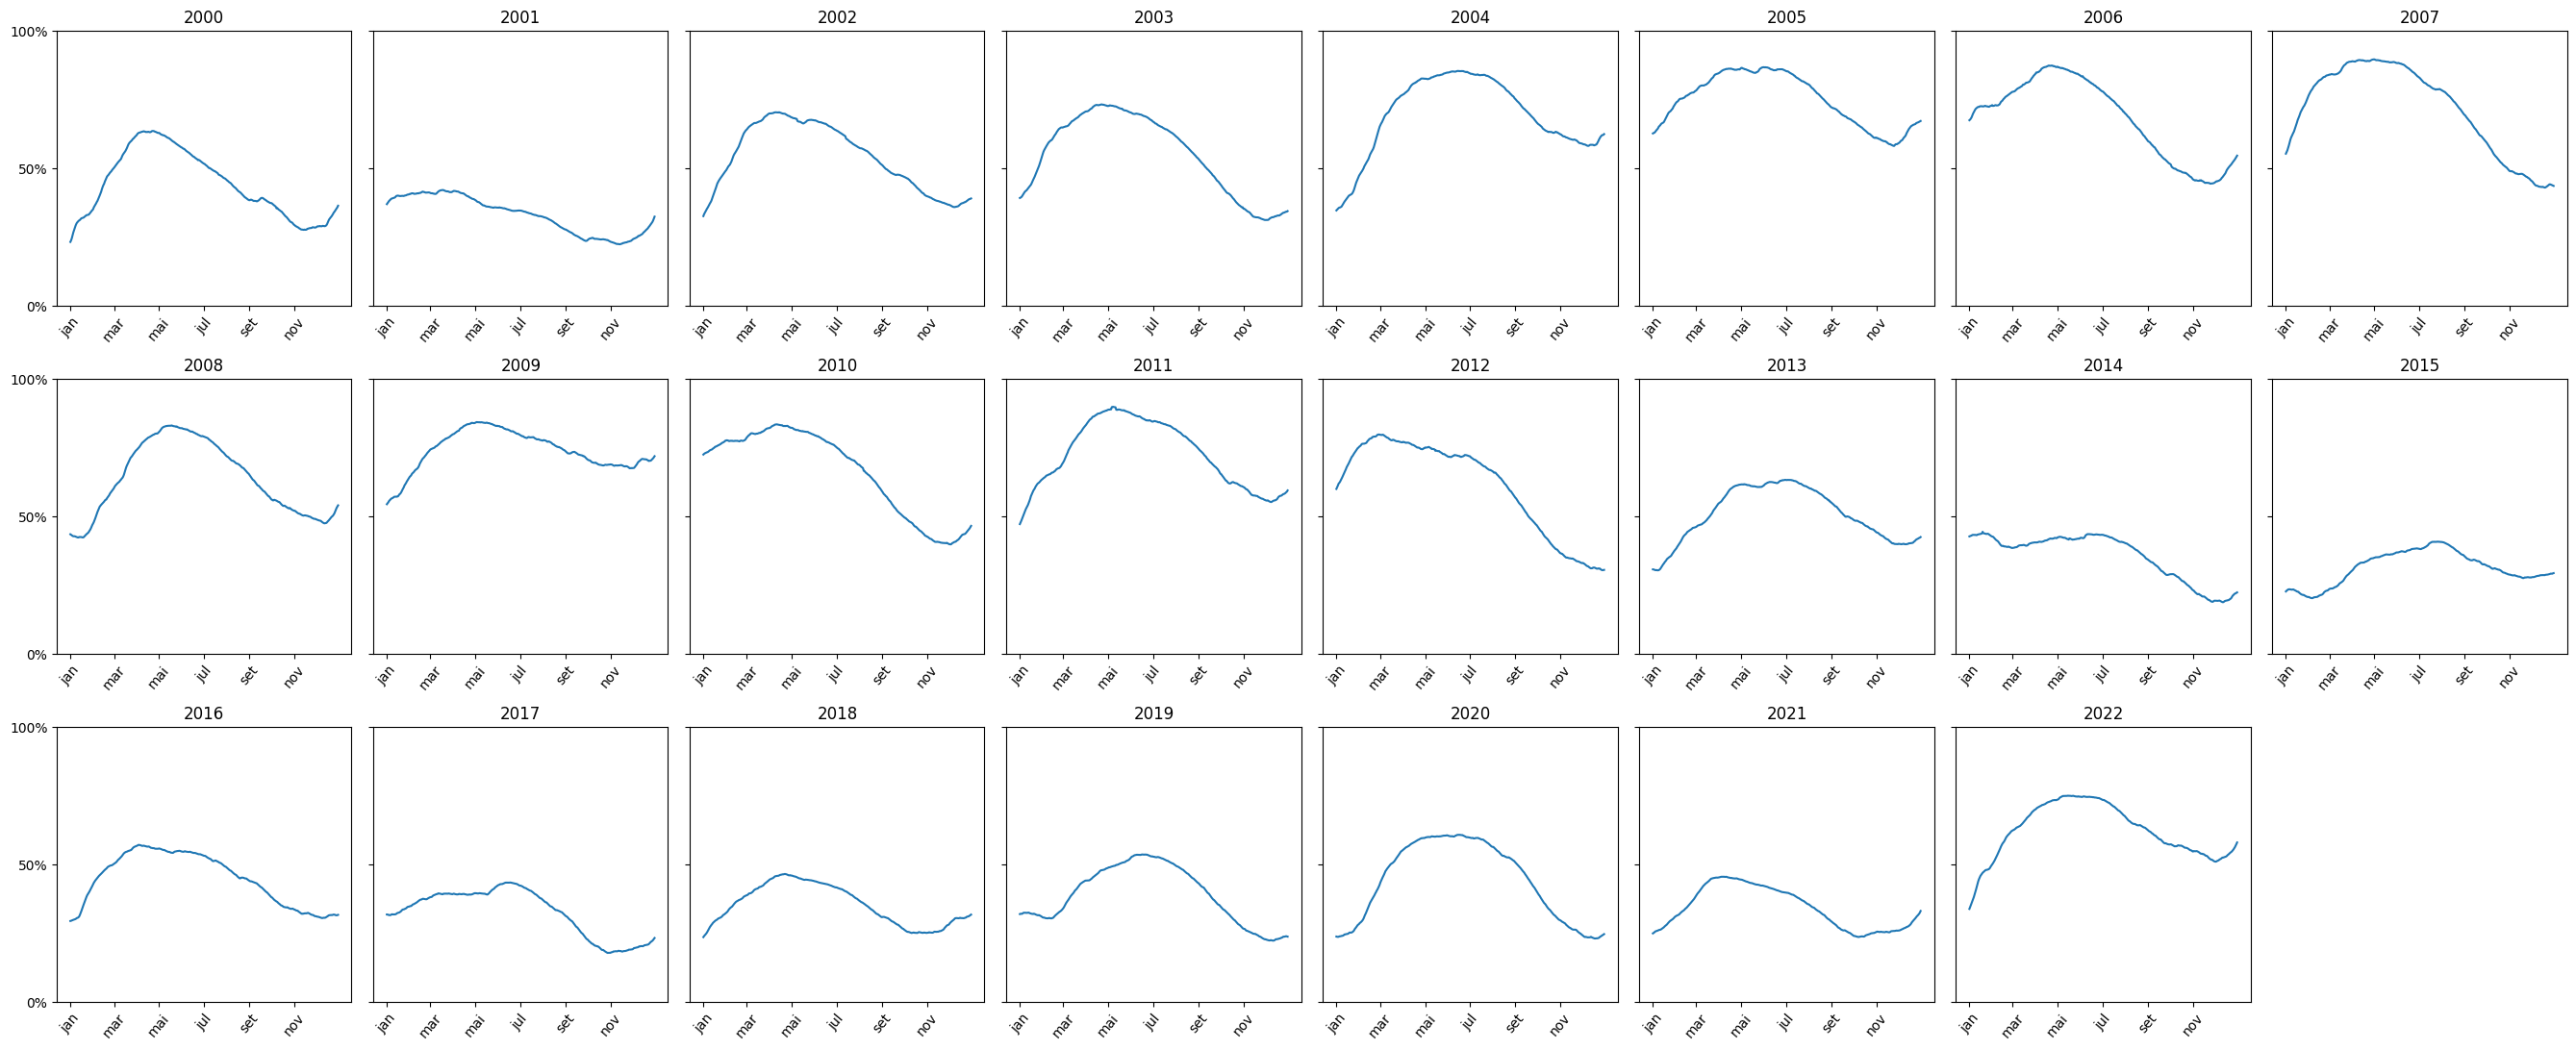

In [34]:
n_rows=3
n_columns = 24//n_rows

fig, ax = plt.subplots(n_rows,n_columns)
fig.set_size_inches(27/8*n_columns, 11/3*n_rows)


a = list(range(n_rows))
b = list(range(n_columns))
generator = ((element_a,element_b) for element_a in a for element_b in b)



for year in range(2000,2024):
    index = next(generator)
    axis = ax[index[0]][index[1]]

    x=armazenamento_total_df.loc[lambda x: x.index.year==year].index
    y=armazenamento_total_df.loc[lambda x: x.index.year==year]['EAR%'].values

    axis.plot(x,y)
    
    axis.set_yticks([0,50,100])
    axis.set_title(str(year))

    if index[1]==0:
        axis.set_yticklabels(['0%','50%','100%'])
    else:
        axis.set_yticklabels(['','',''])


    daterange = pd.date_range(start =f'{year}-01-01', end =f'{year}-12-31', freq ='2MS')
    label = [datetime.datetime.strftime(date,'%b') for date in daterange]
    axis.set_xticks(daterange)
    axis.set_xticklabels(label)

    axis.tick_params(axis='x',rotation=50)

fig.tight_layout(pad=1)

ax[-1][-1].axis('off')
ax[-1][-1].set_title('')
ax[-1][-1].lines[0].remove()

plt.savefig('FIGURAS\\EAR GRID.svg')


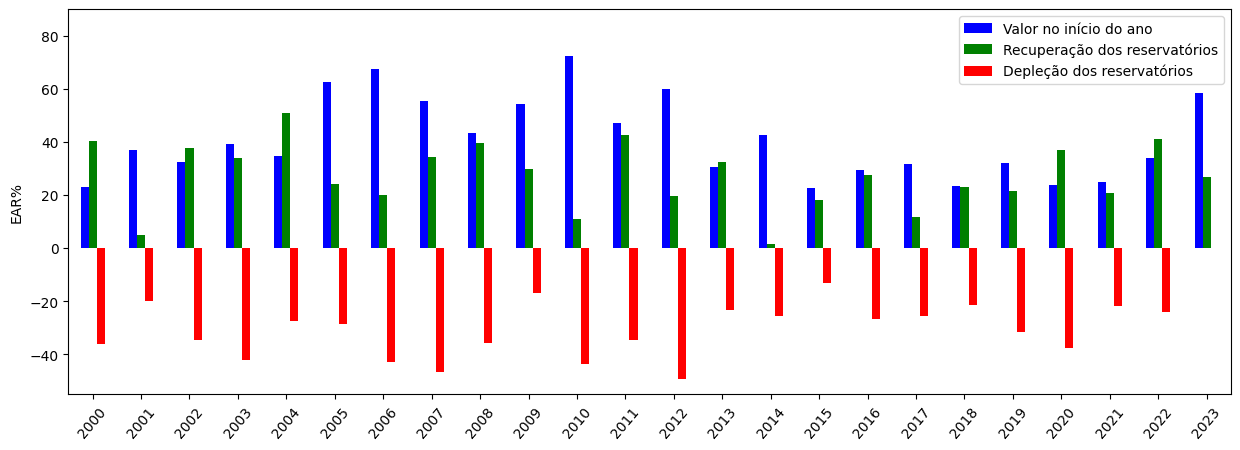

In [35]:
ax = recuperacao_deplecao_df[['first', 'Variação', 'Variação_f']].plot(kind='bar', figsize=(15,5), color=['blue','green','red'])
ax.set_xticklabels([datetime.datetime.strftime(date,'%Y') for date in recuperacao_deplecao_df.index ])
ax.tick_params(axis='x',rotation=50)
ax.legend(['Valor no início do ano','Recuperação dos reservatórios','Depleção dos reservatórios'])
ax.set_xlabel('')
ax.set_ylabel('EAR%')
ax.set_ylim((-55,90))
plt.savefig('FIGURAS\\GRAFICOS_RECUPERACAO_DEPLECAO.svg')

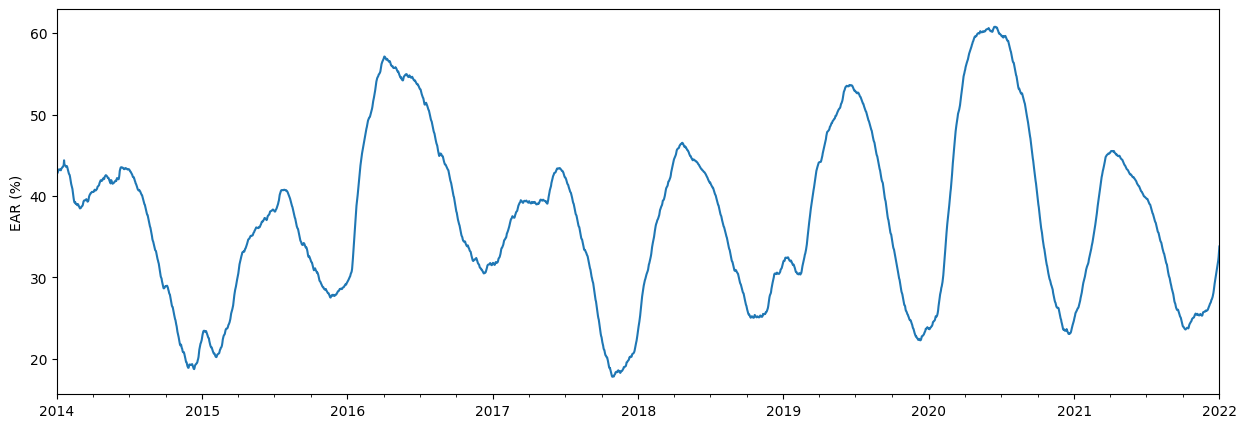

In [36]:
ax = (zoom_dataframe[zoom_dataframe.columns[1::3]].sum(axis=1)/zoom_dataframe[zoom_dataframe.columns[0::3]].sum(axis=1)*100).plot(ylabel='EAR (%)', xlabel='', figsize=(15,5))
#ax.legend(['TOTAL'], loc='upper left', fontsize=15)

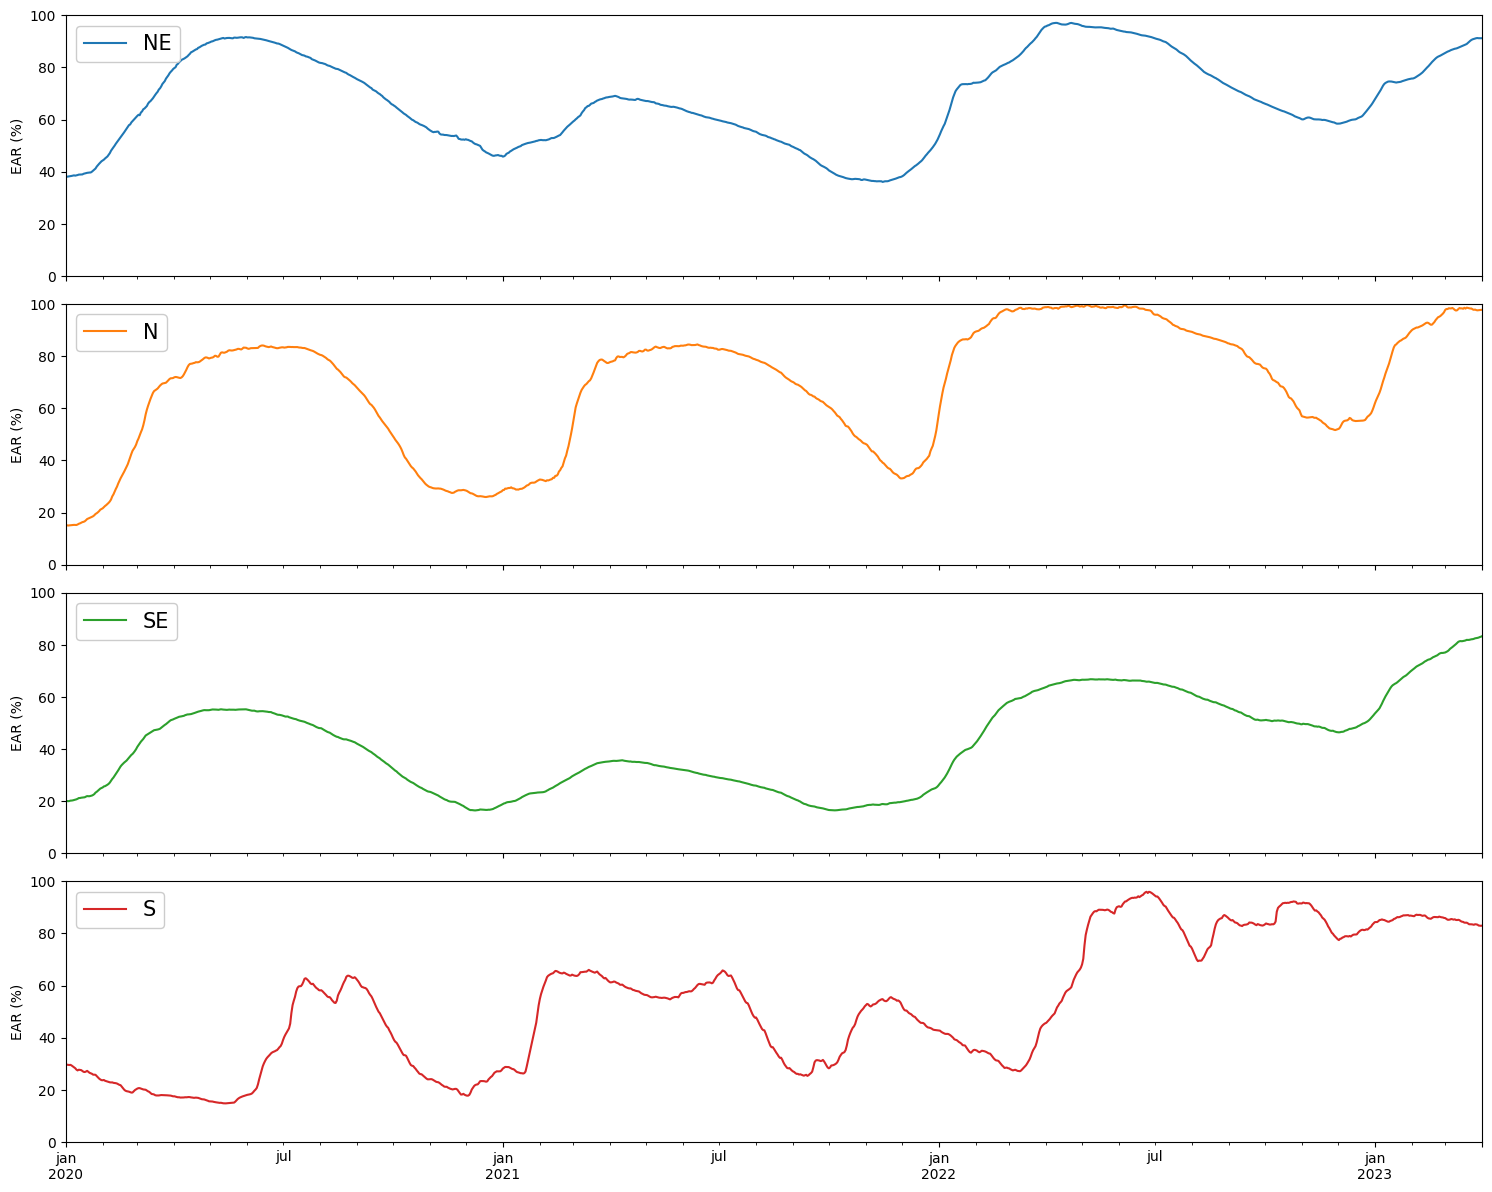

In [37]:
pos=['upper left', 'upper left', 'upper left', 'upper left']
subsystems=['NE','N','SE','S']
subplots = final_EAR_dataframe.loc[lambda x: x.index.year>=2020][final_EAR_dataframe.columns[2::3]].plot(subplots=True, layout=(4,1), figsize=(15,12), ylabel='EAR (%)', ylim=(0,100), xlabel='')
for i, subplop in enumerate(subplots):
    subplop[0].legend([subsystems[i]], loc=pos[i], framealpha=1, fontsize=15)
    
plt.tight_layout(pad=1)
_ = plt.savefig('FIGURAS\\Níveis_Energia_Armazenada.svg')

In [38]:
final_EAR_dataframe.loc[lambda x: (x.index>='2021-12-01')&(x.index<='2022-11-01')][['ear_verif_subsistema_percentual_SE']].max()

ear_verif_subsistema_percentual_SE    66.792397
dtype: float64

In [39]:
66.8-61.5

5.299999999999997

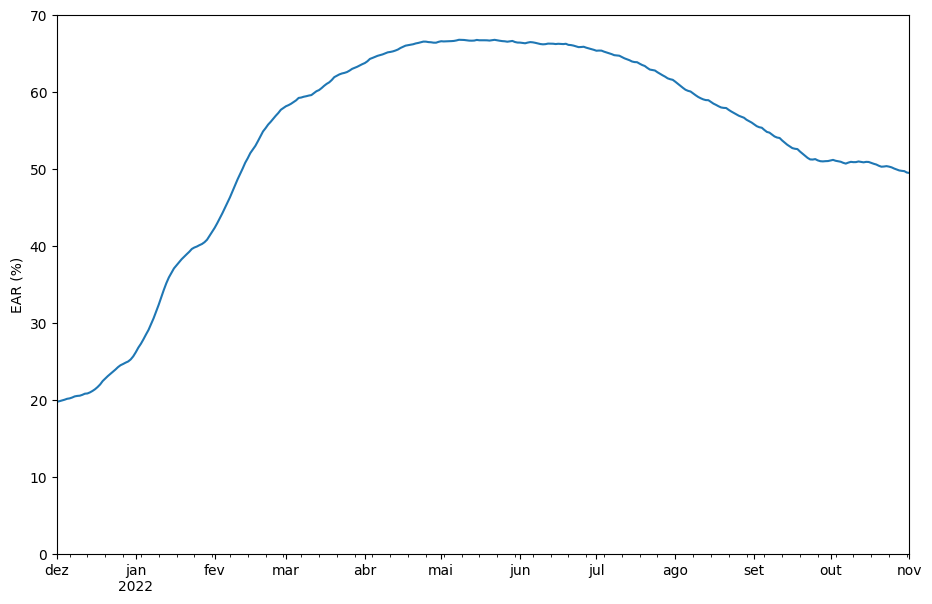

In [40]:
final_EAR_dataframe.loc[lambda x: (x.index>='2021-12-01')&(x.index<='2022-11-01')][['ear_verif_subsistema_percentual_SE']].plot(ylim=(0,70), legend='', ylabel='EAR (%)', xlabel='', figsize=((11,7)))
plt.savefig('FIGURAS\EAR_NO_PERIODO_PREVISTO.svg')

In [42]:
PLD.to_excel('pld_semanal.xlsx')

In [51]:
final_CMO_dataframe.to_excel('cmo_semanal.xlsx')

In [52]:
EAR_TOTAL = (final_EAR_dataframe[final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.columns[0::3]].sum(axis=1)*100).copy()

Text(2020-06-02 00:00:00, 26, 'Início\ndo Despacho\nFora de Ordem\nde Mérito\nPara Atender\n o Subsistema Sul')

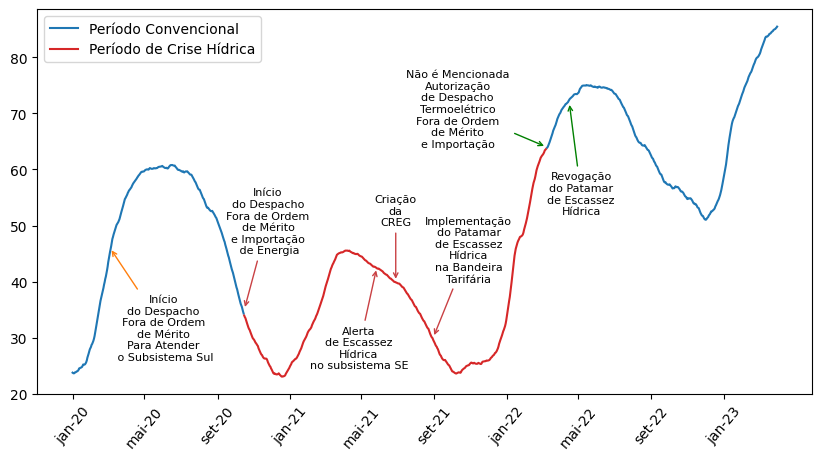

In [53]:
fig, ax = plt.subplots()

fig.set_size_inches(10,5)
#EAR_TOTAL.loc[lambda x: x.index.year>=2020].plot()
y = EAR_TOTAL.loc[lambda x: (x.index.year>=2020)& (x.index<'2020-10-16')].values
x1 = EAR_TOTAL.loc[lambda x: (x.index.year>=2020)& (x.index<'2020-10-16')].index
ax.plot(x1,y, color='#1f77b4', label='Período Convencional')

y = EAR_TOTAL.loc[lambda x: (x.index>='2020-10-16')& (x.index<'2022-03-09')].values
x = EAR_TOTAL.loc[lambda x: (x.index>='2020-10-16')& (x.index<'2022-03-09')].index
ax.plot(x,y, color='#d62728', label='Período de Crise Hídrica')

y = EAR_TOTAL.loc[lambda x: (x.index>'2022-03-09')].values
x2 = EAR_TOTAL.loc[lambda x: (x.index>'2022-03-09')].index
ax.plot(x2,y, color='#1f77b4')

daterange = pd.date_range(start =x1[0], 
         end =x2[-1], freq ='4MS')
label = [datetime.datetime.strftime(date,'%b-%y') for date in daterange]

plt.legend()


ax.set_xticks(daterange)
ax.set_xticklabels(label)
ax.tick_params(axis='x',rotation=50)

altura = 40
color='k'
data = '2021-06-28'
ax.annotate('Criação\nda\nCREG', xy=(datetime.datetime.strptime(data,'%Y-%m-%d'),altura),xytext =(datetime.datetime.strptime(data,'%Y-%m-%d'), altura+10),arrowprops = dict(arrowstyle='->',color ='#c94144'), color=color, ha='center', fontsize=8)

altura = 42.5
color='k'
data = '2021-05-27'
offset = -18
ax.annotate('Alerta\nde Escassez\nHídrica\nno subsistema SE', xy=(datetime.datetime.strptime(data,'%Y-%m-%d'),altura),xytext =(datetime.datetime.strptime(data,'%Y-%m-%d')- datetime.timedelta(days=30), altura+offset),arrowprops = dict(arrowstyle='->',color ='#c94144'), color=color, ha='center', fontsize=8)

altura = 30
color='k'
data = '2021-08-30'
ax.annotate('Implementação\ndo Patamar\nde Escassez\nHídrica\nna Bandeira\nTarifária', xy=(datetime.datetime.strptime(data,'%Y-%m-%d'),altura),xytext =(datetime.datetime.strptime(data ,'%Y-%m-%d') + datetime.timedelta(days=60), altura+10),arrowprops = dict(arrowstyle='->',color ='#c94144'), color=color, ha='center', fontsize=8)

altura = 72
color='k'
data = '2022-04-16'
ax.annotate('Revogação\ndo Patamar\nde Escassez\nHídrica', xy=(datetime.datetime.strptime(data,'%Y-%m-%d'),altura),xytext =(datetime.datetime.strptime(data ,'%Y-%m-%d') + datetime.timedelta(days=20), altura-20),arrowprops = dict(arrowstyle='->',color ='g'), color=color, ha='center', fontsize=8)

altura = 64
color='k'
data = '2022-03-09'
ax.annotate('Não é Mencionada\nAutorização\nde Despacho\nTermoelétrico\nFora de Ordem\nde Mérito\ne Importação', xy=(datetime.datetime.strptime(data,'%Y-%m-%d'),altura),xytext =(datetime.datetime.strptime(data ,'%Y-%m-%d') - datetime.timedelta(days=150), altura),arrowprops = dict(arrowstyle='->',color ='g'), color=color, ha='center', fontsize=8)

altura = 35
color='k'
data = '2020-10-16'
ax.annotate('Início\ndo Despacho\nFora de Ordem\nde Mérito\ne Importação\n de Energia', xy=(datetime.datetime.strptime(data,'%Y-%m-%d'),altura),xytext =(datetime.datetime.strptime(data ,'%Y-%m-%d') + datetime.timedelta(days=40), altura+10),arrowprops = dict(arrowstyle='->',color ='#c94144'), color=color, ha='center', fontsize=8)

altura = 46
color='k'
data = '2020-03-04'
ax.annotate('Início\ndo Despacho\nFora de Ordem\nde Mérito\nPara Atender\n o Subsistema Sul', xy=(datetime.datetime.strptime(data,'%Y-%m-%d'),altura),xytext =(datetime.datetime.strptime(data ,'%Y-%m-%d') + datetime.timedelta(days=90), altura-20),arrowprops = dict(arrowstyle='->',color ='#ff7f0e'), color=color, ha='center', fontsize=8)

<Axes: xlabel='ear_data'>

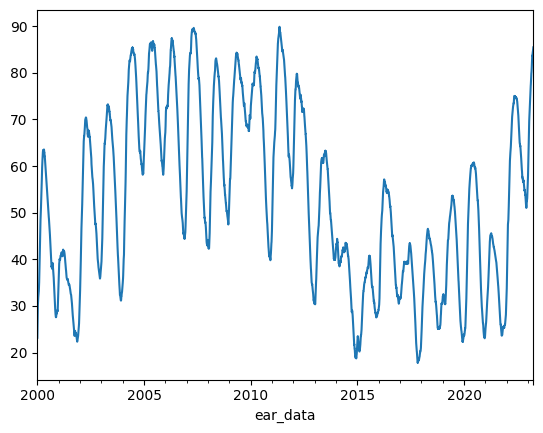

In [54]:
EAR_TOTAL.plot()

In [55]:
daterange = pd.date_range(start =x[0], 
         end =x[-1], freq ='MS')

In [56]:
daterange

DatetimeIndex(['2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01'],
              dtype='datetime64[ns]', freq='MS')